## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Data Preparation**

## **Importing Libraries and the Dataset**

In [72]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Defining url of saved csv file
url = 'https://drive.google.com/uc?id=1C9AxF9fcVzMw0Bgs0NaRrNML2WwX1Ehm'

# Importing dataset to create a dataframe
df = pd.read_csv(url)

## **Some Basic Checks**

In [74]:
# Checking shape pf dataframe
df.shape

(119390, 32)

In [75]:
# Checking top 5 records in dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [76]:
# Checking bottom 5 records in dataframe
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [78]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [79]:
#Check all the coloumns present in our dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Missing Values Treatment**

In [80]:
# Missing data counts and percentage
missing = df.columns[df.isnull().any()].tolist()

print('Missing Data Count')
print(df[missing].isnull().sum().sort_values(ascending = False))
print('--'*12)
print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
company     112593
agent        16340
country        488
children         4
dtype: int64
------------------------
Missing Data Percentage
company     94.31
agent       13.69
country      0.41
children     0.00
dtype: float64


In [81]:
# Removing features with over 50% of its observations missings
df.drop(['company'],axis = 1,inplace=True)

In [82]:
# If no id of children,agent or company is null,replace it with 0
df[['children','agent']] = df[['children','agent']].fillna(0)

In [83]:
# For the missing values in the country column, replace it with mode (value that appears most often)
df['country'] = df['country'].fillna(df.country.mode())

In [84]:
# Removing rows where total member arrived is none
df = df.loc[(df.adults+df.babies+df.children)!=0]

## **Handling Outliers**

In [85]:
# First Removing outliers by defining threshold based on common understanding
new_df = df.copy()

new_df.loc[new_df.stays_in_weekend_nights > 5,'stays_in_weekend_nights'] = 5
new_df.loc[new_df.stays_in_week_nights > 10,'stays_in_week_nights'] = 10
new_df.loc[new_df.adults > 4,'adults'] = 4
new_df.loc[new_df.children > 3,'children'] = 3
new_df.loc[new_df.babies > 3,'babies'] = 3
new_df.loc[new_df.required_car_parking_spaces > 3,'required_car_parking_spaces'] = 3
new_df.loc[new_df.previous_cancellations > 0,'previous_cancellations'] = 1
new_df.loc[new_df.previous_bookings_not_canceled > 0,'previous_bookings_not_canceled'] = 1
new_df.loc[new_df.booking_changes > 5,'booking_changes'] = 5

In [86]:
# Removing outliers by standard methods and Plotting graphs:
for col in ['lead_time','adr','days_in_waiting_list']:
  # Using IQR method and capping to define the range of inliners:
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value and Capping
  new_df[col] = np.where(new_df[col] > upper_limit, median,np.where(
                         new_df[col] < lower_limit,median,np.where(
                         new_df[col] < lower_cap,lower_cap,np.where(
                         new_df[col] > upper_cap,upper_cap,new_df[col]))))

In [87]:
# Some columns have numeric values but those are actually categorical
categorical_features=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
                      "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
                      "customer_type","reservation_status","is_repeated_guest",'same_room','reservation_status_date',
                      'arrival_date_year','arrival_date_day_of_month','agent','company']

numeric_features = [i for i in df.columns if i not in categorical_features]
print(numeric_features)

['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


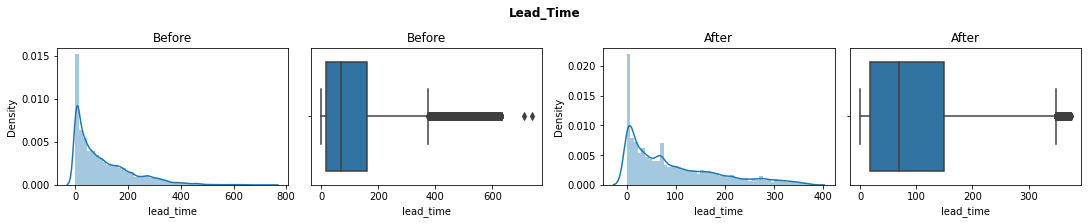

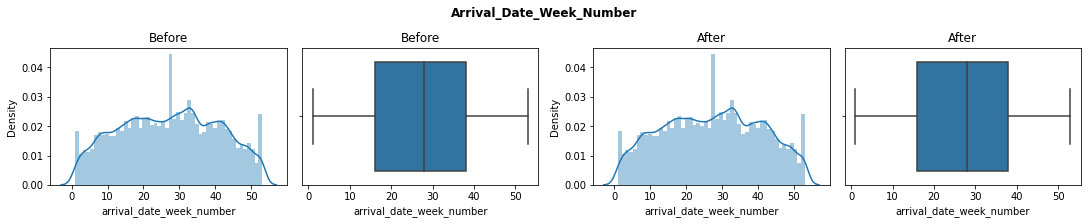

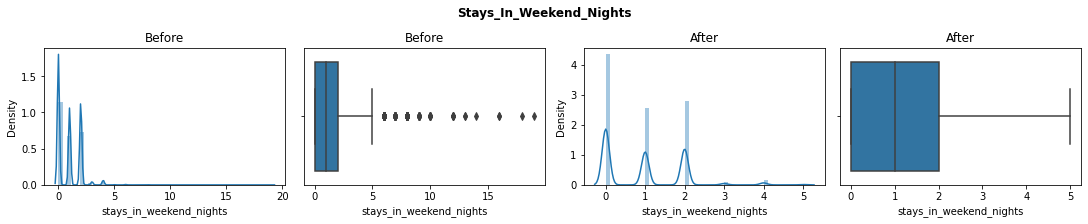

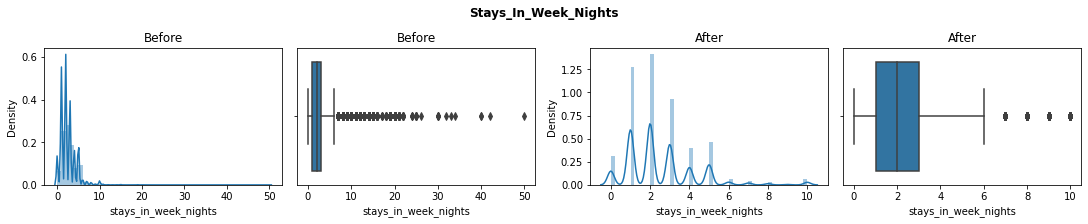

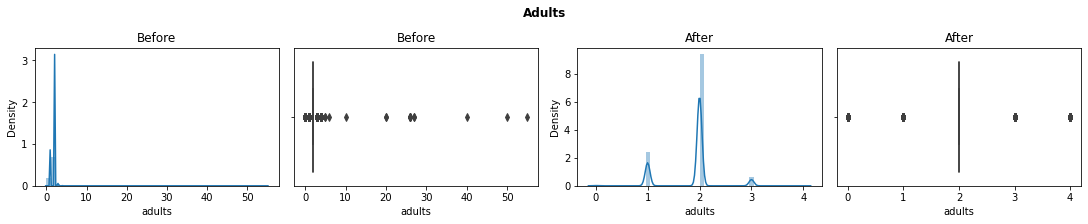

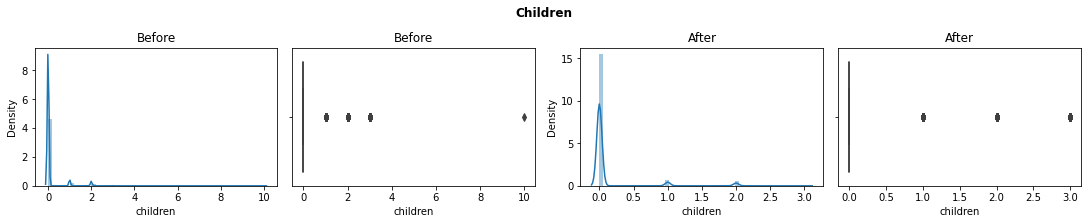

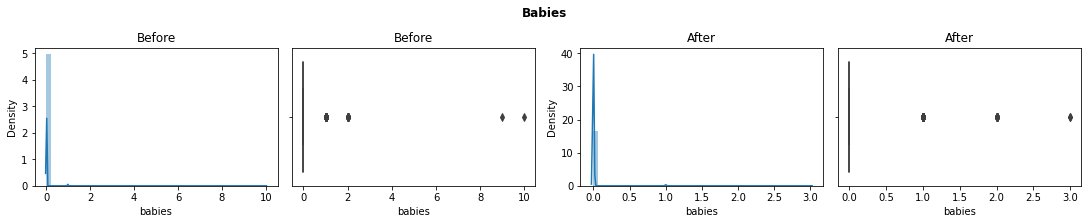

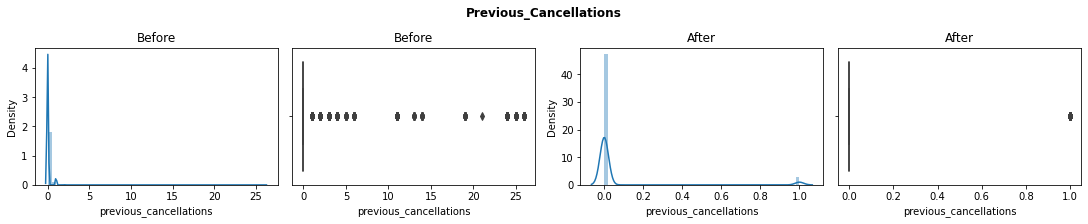

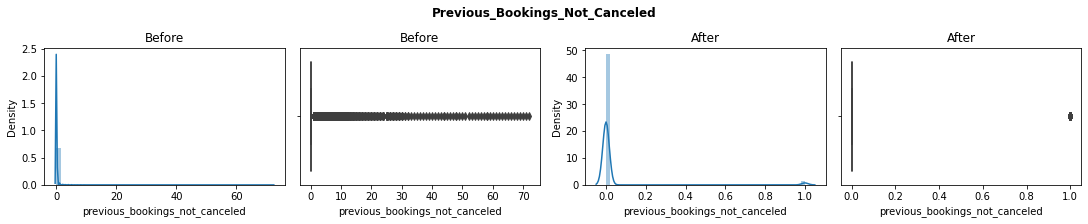

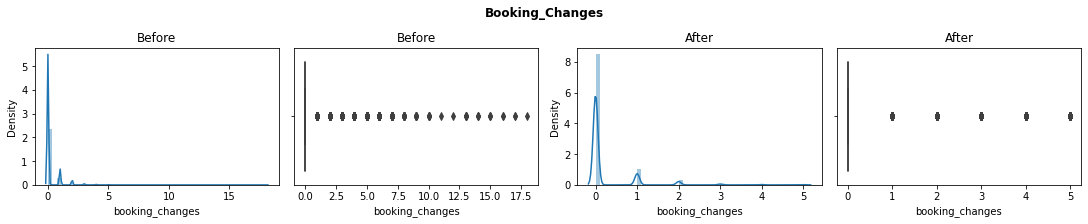

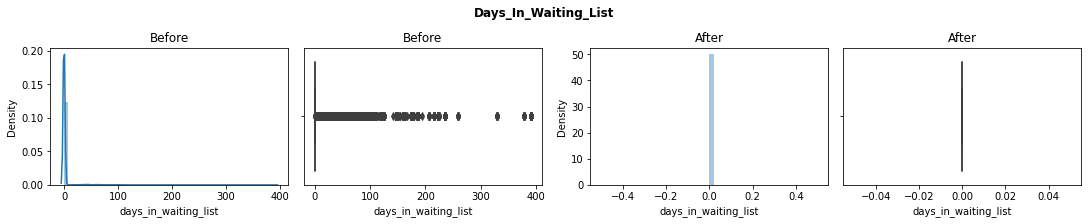

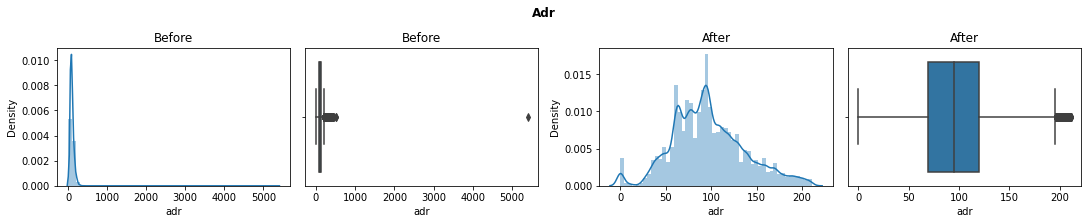

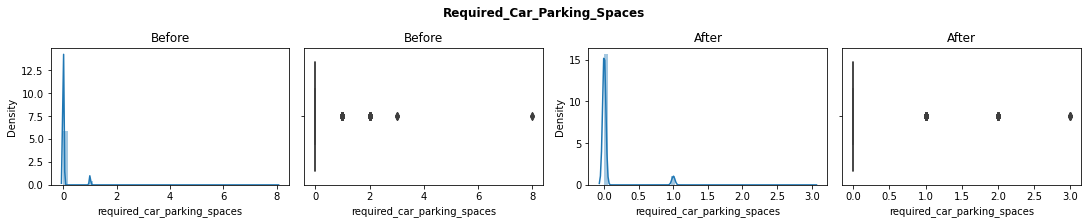

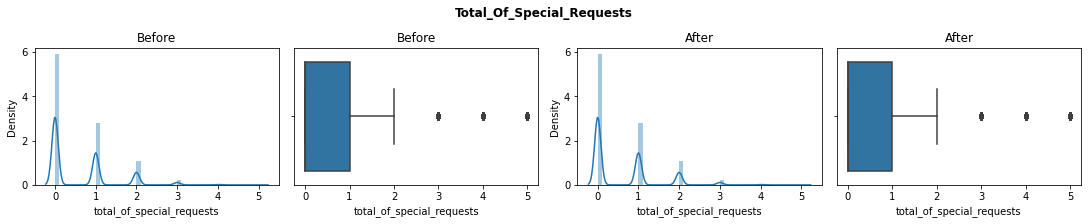

In [88]:
#Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")
  # After treating outliers
  sns.distplot(new_df[col], ax=ax[2]).set(title="After")
  sns.boxplot(new_df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()



##**Cleaning and Manipulating dataset**

In [89]:
# Checking duplicates
print(len(new_df[new_df.duplicated()]))

32052


In [90]:
# Removing duplicates
new_df.drop_duplicates(inplace=True)

# Checking Shape after removing duplicates
new_df.shape

(87158, 31)

In [91]:
# Converting the datatype of relevant columns from float to integer
new_df[['children','agent','adr']] = new_df[['children','agent','adr']].astype('int64')

In [92]:
#creating some new features
new_df['same_room'] = np.where(new_df['reserved_room_type']==new_df['assigned_room_type'], 'yes', 'no')
new_df['total_children'] = new_df['children'] + new_df['babies']
new_df['total_members'] = new_df['total_children'] + new_df['adults']
new_df["total_nights"] = new_df['stays_in_weekend_nights'] + new_df['stays_in_week_nights']
new_df['money_per_person']   = new_df['adr'] * new_df['total_nights'] / new_df['total_members']
new_df['guest_type']= np.where(new_df['total_members']==1,'single',
                      np.where(new_df['total_members']==2,'couple','family'))
new_df['lead_time_category']= np.where(new_df.lead_time<15,'low',
                              np.where((new_df.lead_time>15)&(new_df.lead_time<90),'medium','high'))

In [93]:
new_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_children,total_members,total_nights,money_per_person
count,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.0,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000,87158.000000
mean,0.275201,77.719028,2016.210422,26.833968,15.817596,0.999243,2.601104,1.875858,0.138840,0.010705,0.038229,0.019103,0.040249,0.263866,81.079385,0.0,99.805755,0.084215,0.699110,0.149545,2.025402,3.600346,186.023545
std,0.446618,81.206947,0.686093,13.669435,8.835813,0.993225,1.889426,0.505131,0.455141,0.105224,0.191751,0.136889,0.196543,0.660556,109.965833,0.0,42.221784,0.279482,0.831972,0.469119,0.700875,2.540027,160.638079
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.0,72.000000,0.000000,0.000000,0.000000,2.000000,2.000000,82.500000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.0,94.000000,0.000000,0.000000,0.000000,2.000000,3.000000,147.500000
75%,1.000000,123.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.0,126.000000,0.000000,1.000000,0.000000,2.000000,5.000000,237.000000
max,1.000000,375.000000,2017.000000,53.000000,31.000000,5.000000,10.000000,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,5.000000,535.000000,0.0,210.000000,3.000000,5.000000,3.000000,5.000000,15.000000,2550.000000


In [94]:
# days_in_waiting_list has all zeros in it after outlier treatment. Hence We can drop it.
new_df.days_in_waiting_list.value_counts()

0.0    87158
Name: days_in_waiting_list, dtype: int64

In [95]:
# dropping the columns since we merged both the columns as total_children
new_df.drop(['children','babies','previous_bookings_not_canceled','assigned_room_type','days_in_waiting_list'],axis = 1,inplace=True)

In [96]:
# Making a list of features where number of unique values <= 2
boolean_features = [i for i in new_df.columns if len(new_df[i].value_counts()) <= 2]

# Converting boolean columns from int to object
new_df[boolean_features] = new_df[boolean_features].replace([0,1],['No','Yes'])

In [97]:
# Treating arrival_date_month column for better plot
new_df['arrival_date_month'] = new_df['arrival_date_month'].apply(lambda x:x[:3])

In [98]:
# Creating a dataframe by slicing the original df where bookings were not cancelled
df_not_cancelled = new_df[new_df['is_canceled'] == 'No']

In [99]:
# New look
new_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,reserved_room_type,booking_changes,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,same_room,total_children,total_members,total_nights,money_per_person,guest_type,lead_time_category
0,Resort Hotel,No,342.0,2015,Jul,27,1,0,0,2,BB,PRT,Direct,Direct,No,No,C,3,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,yes,0,2,0,0.0,couple,high
1,Resort Hotel,No,69.0,2015,Jul,27,1,0,0,2,BB,PRT,Direct,Direct,No,No,C,4,No Deposit,0,Transient,0,0,0,Check-Out,2015-07-01,yes,0,2,0,0.0,couple,medium
2,Resort Hotel,No,7.0,2015,Jul,27,1,0,1,1,BB,GBR,Direct,Direct,No,No,A,0,No Deposit,0,Transient,75,0,0,Check-Out,2015-07-02,no,0,1,1,75.0,single,low
3,Resort Hotel,No,13.0,2015,Jul,27,1,0,1,1,BB,GBR,Corporate,Corporate,No,No,A,0,No Deposit,304,Transient,75,0,0,Check-Out,2015-07-02,yes,0,1,1,75.0,single,low
4,Resort Hotel,No,14.0,2015,Jul,27,1,0,2,2,BB,GBR,Online TA,TA/TO,No,No,A,0,No Deposit,240,Transient,98,0,1,Check-Out,2015-07-03,yes,0,2,2,98.0,couple,low


# **Exploratory Data Analysis**



##**Univariate Analysis**

In [119]:
# Defining the list of target variables and varables to be excluded
exclude = [i for i in new_df.columns if len(new_df[i].value_counts()) > 15]
target = [i for i in new_df.columns if i not in exclude]

# Defining r to autofit the number and size of plots
r = int(len(target)/3 +1)

In [120]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
  '''Takes axes as input and labels the percent count of each bar in a countplot'''
  for p in plot.patches:
    total = sum(p.get_height() for p in plot.patches)/100
    percent = round((p.get_height()/total),2)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

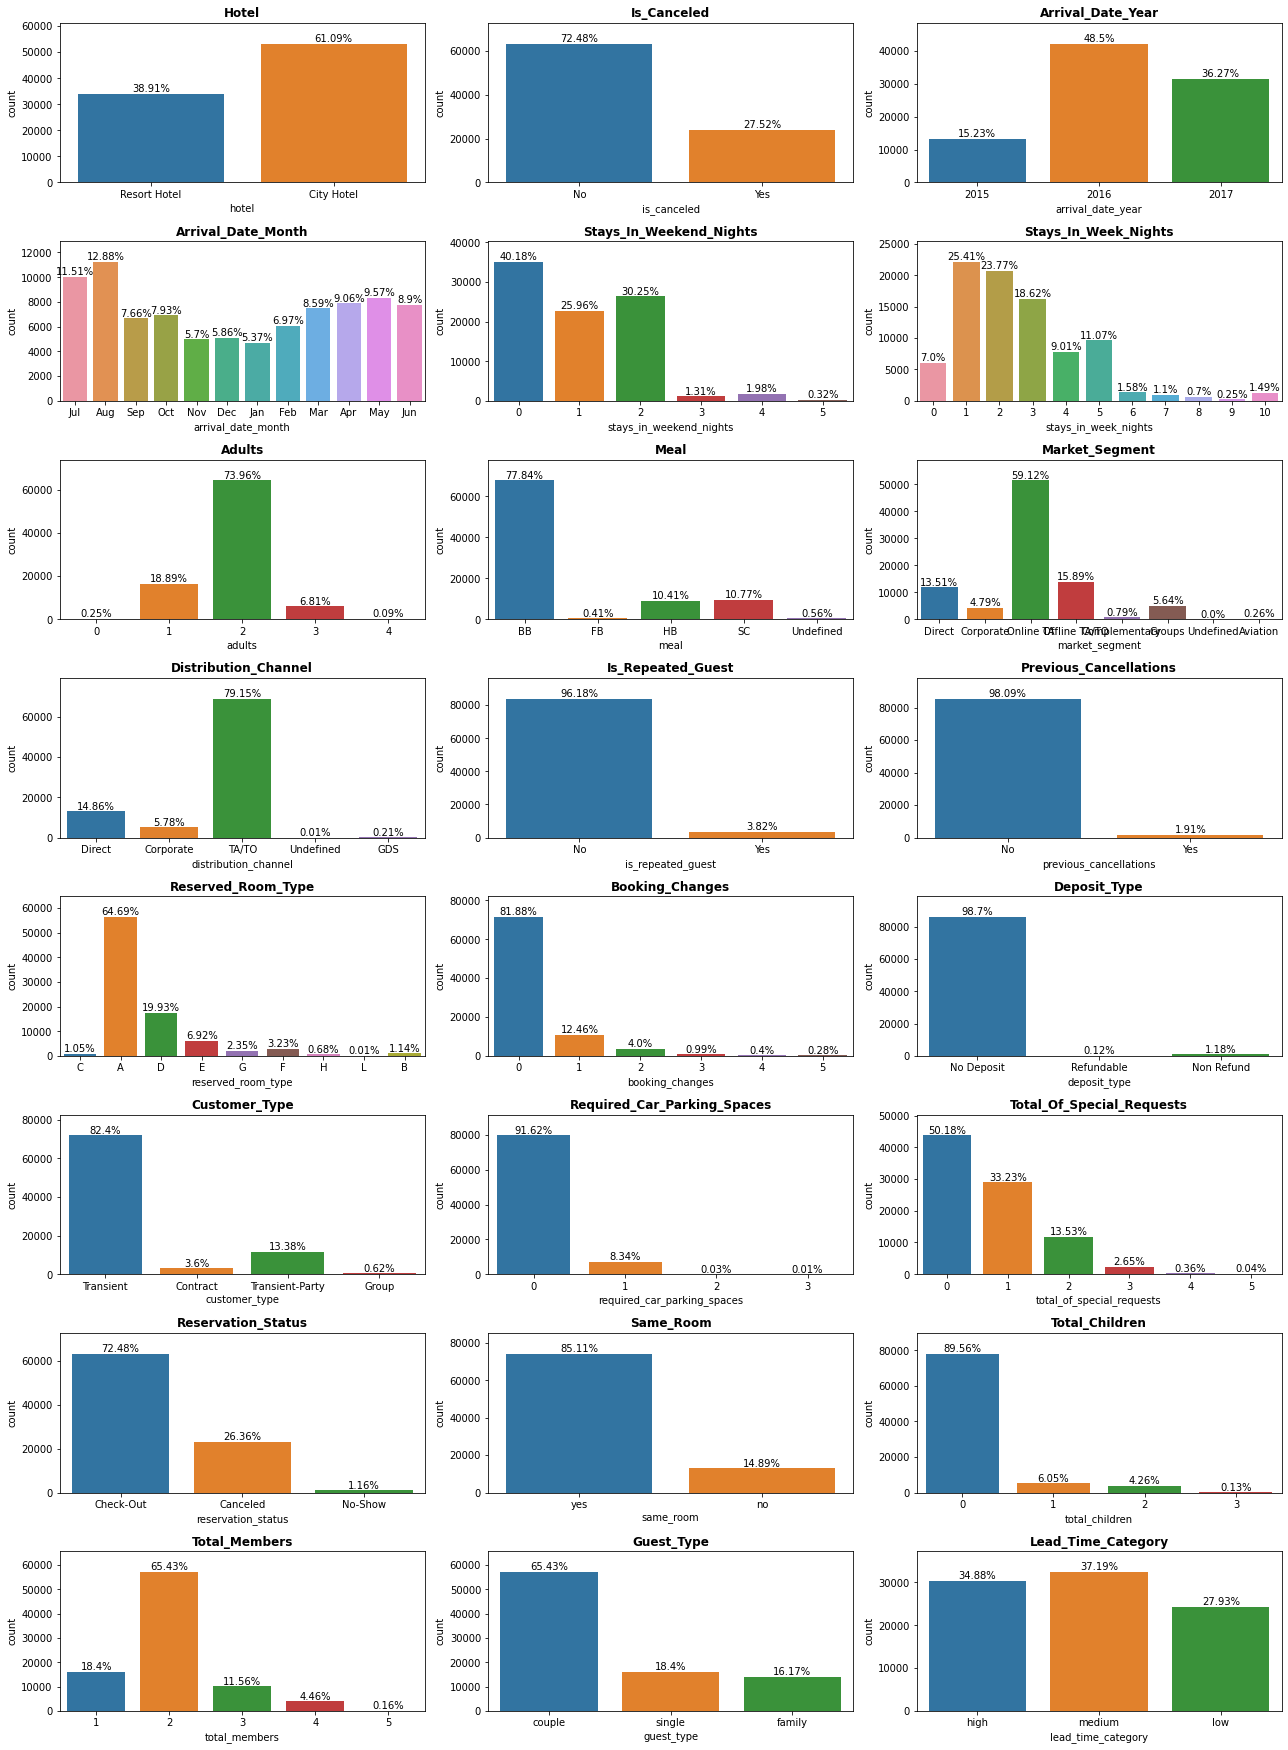

In [121]:
# Plotting the countplots for each target variable
plt.figure(figsize=(18,r*3))
for n,column in enumerate(target):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(new_df[column]).margins(y=0.15)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()
  annot_percent(plot)

Observations:
1. More than 60% of the bookings are of City Hotel.
2. Nearly one third of the bookings are cancelled.
3. There was an annual 218.5% rise in hotel bookings in 2016 which dropped down by 25.2% in 2017
4. August is the most preffered month by people for bookings.
5. Most preferred meal is BB(Bread and Breakfast.
6. Most of the customers are coming through Online.
7. Top distribution chanell is TA/TO
8. Only 3.82% of the guests are arriving again.
9. People who cancel bookings do not really book again.
10. Room type A is the most preferred one.
11. People donot want to pre-deposit the money.
12. More than 90% of people donot require any parking space.
13. Around 15% of guests are not assigned with their preferred room.
14. Around 10% of the guests arrive with children.
15. Atleast 2 people arrive 80% of the times.
16. Around 15% of the people visit with their family.



##**Hotelwise Analysis**

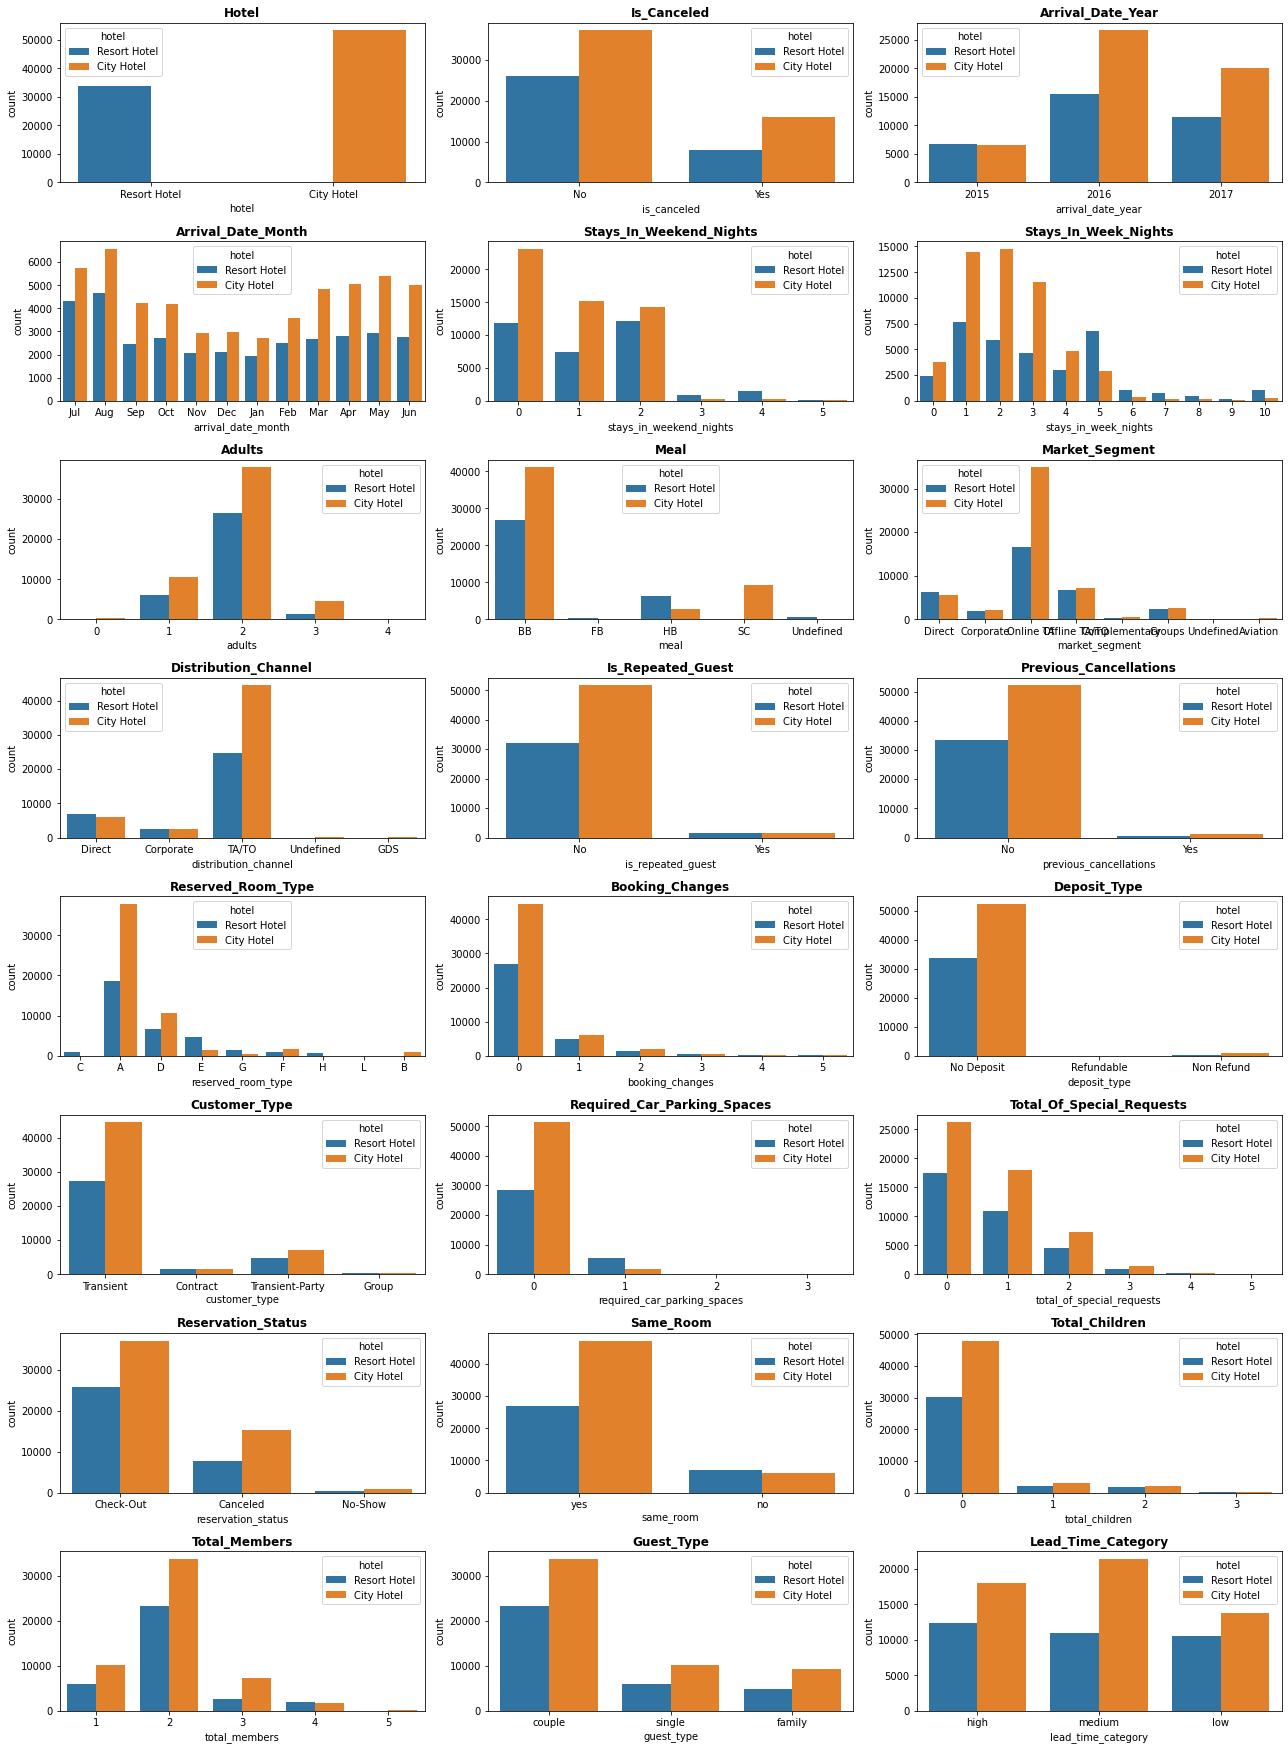

In [122]:
# Hotelwise Comparative Analysis
plt.figure(figsize=(18,r*3))
for n,column in enumerate(target):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(new_df[column],x= column, hue=new_df['hotel'])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

Observations:
1. People prefer City Hotel more as compared to Resort Hotel.
2. Cancellation % for city hotel is slightly more than thaat of city hotel.
3. Resort hotel was leading in 2015 in terms of bookings. But City hotel defeated it for next two years.
4. People who stay for more than 4 nights prefer Resort hotel the most.
5. People who prefer HB( Half board) meal plan (Breakfast and evening meals included) also prefer Resort hotel the most. City hotel is leading in rest all meal plans.
6. Resort hotel is leading in Direct marketing but lagging with a huge margin in online segment.
7. People who require car parking spaces also prefer Resort hotel. Otherwise City hotel is preferred the most 
8. City hotel assigns the same room as reserved by the guests most of the time. While Resort hotel fails to do so more for more than 25% of guests.

##**Bivariate Analysis**

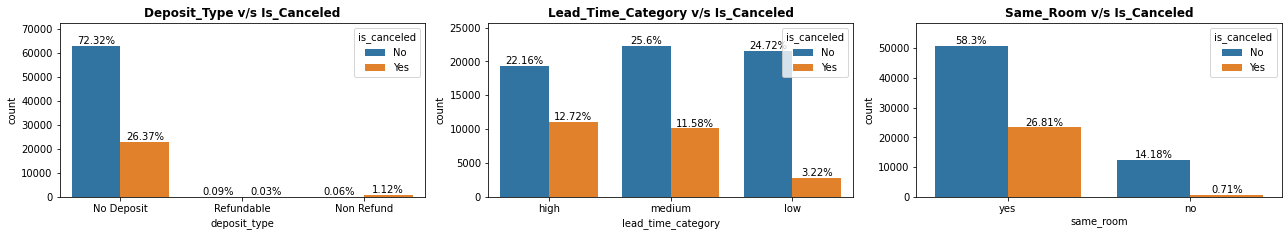

In [123]:
# Booking Cancellation Analysis by redefining target variables
target = ['deposit_type','lead_time_category','same_room']
plt.figure(figsize=(18,r*3))
for n,column in enumerate(target):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(data=new_df,x= column, hue='is_canceled')
  plt.title(f'{column.title()} v/s Is_Canceled',weight='bold')
  plt.margins(y=0.15)
  plt.tight_layout()
  annot_percent(plot)

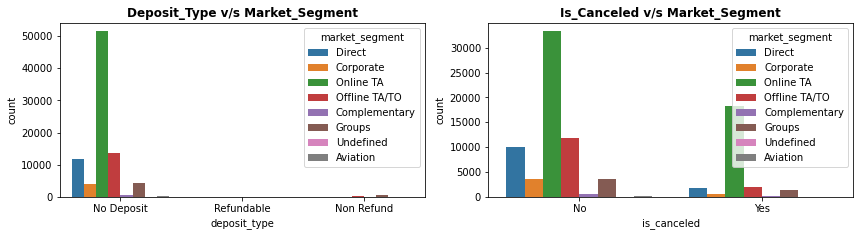

In [124]:
# Market Segment Analysis
plt.figure(figsize=(18,r*3))
for n,column in enumerate(['deposit_type','is_canceled']):
  plot = plt.subplot(r,3,n+1)
  sns.countplot(data=new_df,x= column, hue='market_segment')
  plt.title(f'{column.title()} v/s Market_Segment',weight='bold')
  plt.tight_layout()

Observations:
1. Most of the bookings are cancelled where there was no deposit made. That's because most of people didn't make deposits. So it's not a reason for cancellation.
2. If the lead time is low, less people cancel the bookings. But If the bookings are made more than 15 days in advance, there are comparatively high chances of cancellation. We can conclude this because the data is almost equally distributed among low medium and high lead time.
3. Not having assigned the same room is not a reason for cancellation. As only 0.7% of bookings were cancelled when the same room was not assigned.
4. More than 30% of the online bookings are cancelled. Direct bookings have very less cancellation%.

## **Multivariate Analysis**

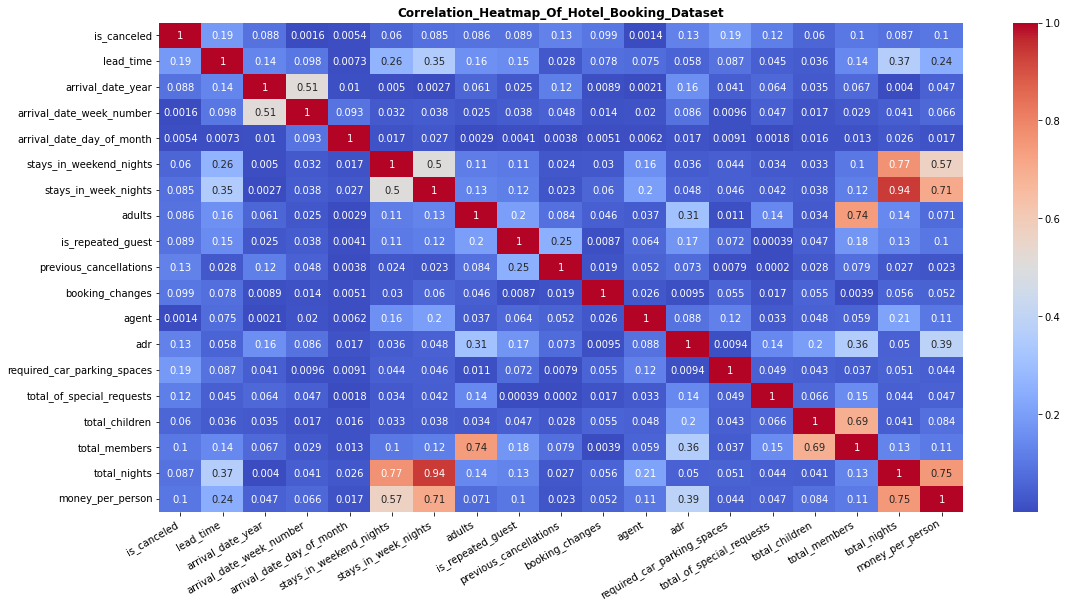

In [125]:
# Correlation Analysis
plt.figure(figsize=(18,9))
plot = sns.heatmap(abs(new_df.replace(['Yes','No'],[1,0]).corr()), annot=True, cmap='coolwarm')
plt.title('Correlation_Heatmap_Of_Hotel_Booking_Dataset', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

Observations:
1. In the heatmap, It shows some high correlations between few variables, thats because we have created some new columns from existing columns and have not dropped it later.
2. Total special requests depends more on total members arrived.
3. Average daily revenue depends more on total special requests and total members as compared to other variables.

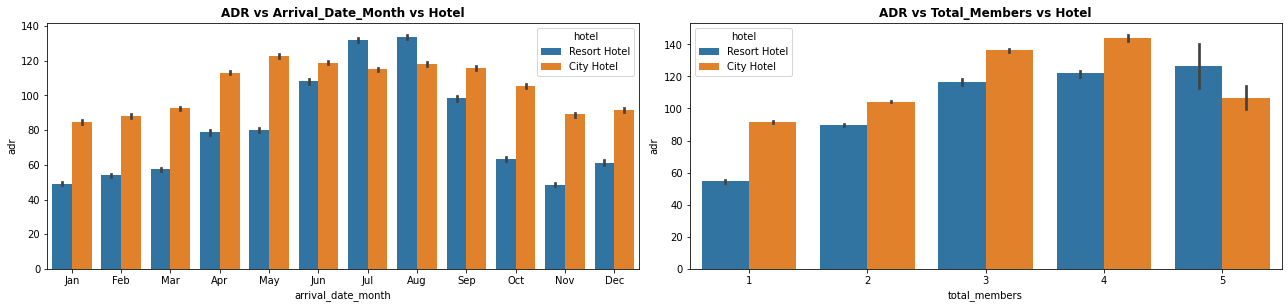

In [126]:
# ADR based on aarival_month and total_members for both hotels
plt.figure(figsize=(18,r*4))
orders = [['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5]]
for n,col in enumerate(['arrival_date_month','total_members']):
  plot = plt.subplot(r,2,n+1)
  sns.barplot(x=col, y='adr', hue='hotel', dodge=True, data=new_df,order=orders[n])
  plt.title(f'ADR vs {col.title()} vs Hotel', weight='bold')
  plt.tight_layout()

Observations:
1. Average Daily Revenue rises from jan to Aug then again falls down from Aug to Dec.
2. Resort hotel leads in ADR only during the peak months July and August. Rest all months City hotel has high ADR.
3. April to September is the semester with high ADR for both hotels
4. ADR for Resort hotel is directly prortional to total members.
5. Seems like City hotel is giving some discount offers for members more than 4 because the ADR has drastic decrease for members more than 4.

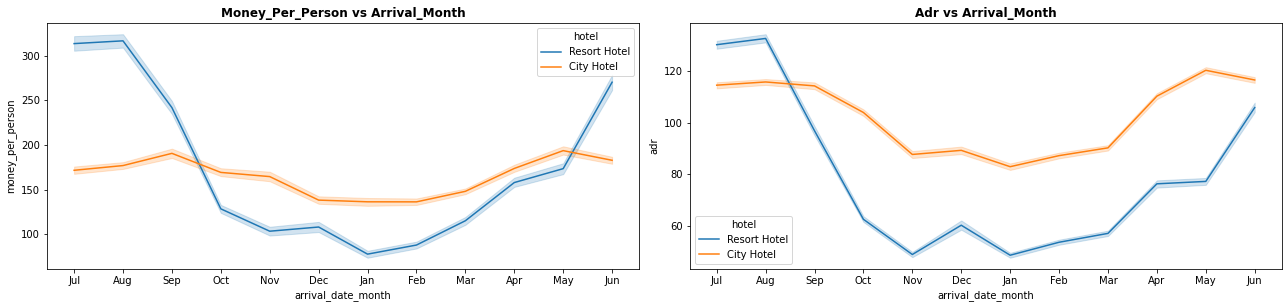

In [127]:
# Checking Best time to book hotel
plt.figure(figsize=(18,r*4))
for n,col in enumerate(['money_per_person','adr']):
  plot = plt.subplot(r,2,n+1)
  sns.lineplot(data = df_not_cancelled, x = 'arrival_date_month', y =col, hue = 'hotel')
  plt.title(f'{col.title()} vs Arrival_Month', weight='bold')
  plt.tight_layout()

Observations:
1. Best time to book a hotel is in January. As money spent is lesser.
2. City hotel seems consistent with the price throughout the year.



##**Additional Checks**

In [128]:
# Some features were excluded during univariate analysis. Lets see them
print(exclude)

['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'country', 'agent', 'adr', 'reservation_status_date', 'total_nights', 'money_per_person']


In [129]:
# Average lead_time
print(f'Average time taken for customer arrival after making reservation : {int(new_df.lead_time.mean())} days')
# Average nights spent by visitors
print(f'Average nights spent by visitors: {int(new_df.total_nights.mean())}')
# Average money spent by visitors
print(f'Average money spent by visitors: {int(new_df.money_per_person.mean())} Bucks')

Average time taken for customer arrival after making reservation : 77 days
Average nights spent by visitors: 3
Average money spent by visitors: 186 Bucks


In [130]:
# Most bookings are from these countries
new_df.country.value_counts().head()

PRT    27309
GBR    10421
FRA     8821
ESP     7237
DEU     5385
Name: country, dtype: int64

In [131]:
# Agent with high bookings
top_agents = pd.DataFrame(df_not_cancelled['agent'].value_counts().reset_index().head())
top_agents.columns = ['agent','bookings']
top_agents

,agent,bookings
0,9,17193
1,0,10566
2,240,8074
3,7,2858
4,14,2759


#**Conclusion**

1. Top Hotel - City Hotel. Top meal - Bread and Breakfast. Top Agent - Agent No. 9. Top room type - A
2. One out of every three bookings are cancelled.
3. People prefer to tour more in August.
4. Most preferred meal is BB(Bread and Breakfast.
5. Online marketing is the best way to attract customers.
6. People donot want to pre-deposit the money for booking.
7. Only 10% of people require parking space.
8. Most of the visitors are couples.
9. Resort hotel is preferred mostly for longer stay,day time stays. and when the parking space is needed.
10. More than 15 days advance bookings have high chances of cancellation.
11. Assigning different room is not a reason for cancellation.
12. Direct bookings have very less cancellation%.
13. Best time to book a hotel is in January.
14. Average days in advance booking : 77 days
15. Average nights spent by visitors: 3
16. Most visitors are from these countries: Portugal, Britain, France, Spain and Germany.
17. Total Special requests and the revenue depends more on total members arrived.